In [53]:
import numpy as np
import pandas as pd
import copy
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('골프장데이터합친거.csv')

In [7]:
df.isnull().sum()

골프장명           0
골프장지역명         0
대중제,회원제        0
18             0
사용일자           0
사용시간           0
성별코드           0
나이         15228
도민,비도민         0
실력         23448
골프경력       25557
평균사용값      25561
사용성향       26709
판매업체명          0
dtype: int64

In [15]:
del df['골프경력']

In [20]:
df.dropna(axis=0,inplace=True)

In [26]:
df.reset_index(drop=True,inplace=True)

In [27]:
df

,골프장명,골프장지역명,"대중제,회원제",18,사용일자,사용시간,성별코드,나이,"도민,비도민",판매업체명
0,중문GC,서귀포권,대중제,18,20210531,83537,1,40.0,도민,통화
1,더클래식CC,동부권,대중제,18,20210706,133106,2,40.0,도민,통화
2,더클래식CC,동부권,대중제,18,20210706,134812,2,40.0,도민,통화
3,제주CC,제주시권,대중제,18,20210706,134846,2,40.0,도민,통화
4,스프링데일CC,동부권,대중제,18,20210706,135804,1,40.0,도민,통화
...,...,...,...,...,...,...,...,...,...,...
30093,라온GC,서부권,대중제,27,20201224,1132,2,30.0,도민,라온GC
30094,아덴힐GC,서부권,대중제,18,20210115,809,1,40.0,도민,아덴힐GC
30095,아덴힐GC,서부권,대중제,18,20210113,816,2,40.0,도민,아덴힐GC
30096,아덴힐GC,서부권,대중제,18,20201228,1215,2,40.0,도민,아덴힐GC


In [33]:
df.성별코드=df.성별코드.apply(lambda x: 2 if x==0 else x)

In [34]:
df.성별코드.value_counts()

1    22069
2     8029
Name: 성별코드, dtype: int64

In [36]:
df.나이.value_counts()

40.0    15244
50.0     7252
30.0     5432
60.0     1105
20.0      950
10.0       95
70.0       20
Name: 나이, dtype: int64

In [40]:
df['대중제,회원제'].value_counts()

대중제        21256
회원제+대중제     5170
회원제         3672
Name: 대중제,회원제, dtype: int64

In [43]:
df['18'].value_counts()

18    15005
27     9257
36     5403
9       433
Name: 18, dtype: int64

In [49]:
df.rename(columns={'18':'홀수'},inplace=True)
df.iloc[0][:]

골프장명           중문GC
골프장지역명         서귀포권
대중제,회원제         대중제
홀수               18
사용일자       20210531
사용시간          83537
성별코드              1
나이             40.0
도민,비도민           도민
판매업체명            통화
Name: 0, dtype: object

In [50]:
df.to_csv('정제한골프장데이터.csv',index=False)

In [51]:
df['판매업체명'].value_counts()

통화               12923
라온GC              5031
아덴힐GC             3623
섬프로               3346
해비치CC             3023
사이프러스CC            509
(주)부민가자투어          508
슬기로운골프생활           387
섬프로(롯데스카이힐)        339
섬프로(타미우스)          281
(주)부민가자투어(오라)       47
오라CC                38
섬프로(해비치)            30
엘리시안C.C             13
Name: 판매업체명, dtype: int64

In [64]:
df.groupby(df.나이).골프장명.count()

나이
10.0       95
20.0      950
30.0     5432
40.0    15244
50.0     7252
60.0     1105
70.0       20
Name: 골프장명, dtype: int64

C:\src\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\src\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\src\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\src\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0, flags=flags)


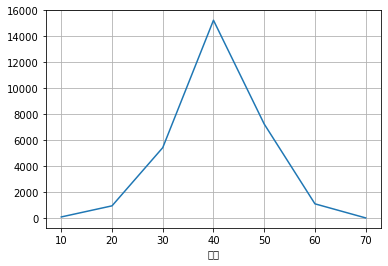

In [67]:
df.groupby(df.나이).골프장명.count().plot()
plt.grid()